In [1]:
def generate_T1_t2(total_time: float, input_time_max: float, process_time_max: float):
    elapsed_time = 0
    input_moments = list()
    process_times = list()

    if input_time_max <= 0:
        raise ValueError("input_time_max should be greater that 0")
    
    while elapsed_time < total_time:
        input_time = random.random() * input_time_max
        process_time = random.random() * process_time_max
        elapsed_time += input_time
        # print(elapsed_time)
        input_moments.append(elapsed_time)
        process_times.append(process_time)

    return elapsed_time, input_moments, process_times

In [2]:
import random

def generalized_model(elapsed_time: float, input_moments: list[float], process_times: list[float]):

    skipped = 0
    downtime = 0

    busy_time_boundaries = list()
    busy_time_boundaries.append( (input_moments[0], input_moments[0]+process_times[0]) )
    for i in range(1, len(input_moments)):
        last_busy_start = busy_time_boundaries[-1][0]
        last_busy_end = busy_time_boundaries[-1][1]

        if last_busy_start < input_moments[i] < last_busy_end:
            skipped += 1
        else:
            downtime += input_moments[i] - last_busy_end

            busy_start = input_moments[i]
            busy_end = busy_start + process_times[i]
            # print(f'Начало и конец обработки пакета #{i}: ({busy_start}, {busy_end})')
            busy_time_boundaries.append( (busy_start, busy_end) )

    proccesed_count = len(input_moments) - skipped

    processing_probability = proccesed_count / len(input_moments)

    downtime_probability = downtime / elapsed_time

    return processing_probability, downtime_probability

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

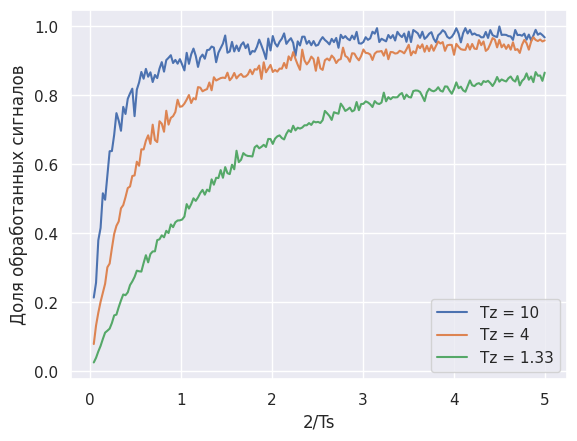

In [11]:
Ts = np.linspace(0.04, 5, 200)
Tz = (10, 4, 1.33)

s_results = dict()


SIMULATION_TIME = 1000

for s in Ts:
    for z in Tz:
        elapsed_time, input_moments, process_times = generate_T1_t2(SIMULATION_TIME, z, 2/s)
        Pp, Pd = generalized_model(elapsed_time, input_moments, process_times)
        res = s_results.get(z, list())
        res.append(Pp)

        s_results[z] = res

# Ts = 2/Ts

for Tz, vals in s_results.items():
    sns.lineplot(x=Ts, y=vals, label=f'Tz = {Tz}')
    plt.gcf().gca().set_xlabel('2/Ts')
    plt.gcf().gca().set_ylabel('Доля обработанных сигналов')


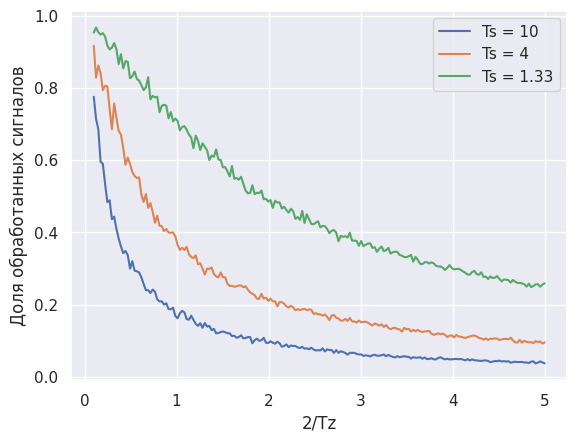

In [14]:
Tz = np.linspace(0.1, 5, 200)
Ts = (10, 4, 1.33)

z_results = dict()


for z in Tz:
    for s in Ts:
        elapsed_time, input_moments, process_times = generate_T1_t2(SIMULATION_TIME, 2/z, s)
        Pp, Pd = generalized_model(elapsed_time, input_moments, process_times)
        res = z_results.get(s, list())
        res.append(Pp)

        z_results[s] = res

for Ts, vals in z_results.items():
    sns.lineplot(x=Tz, y = vals, label=f'Ts = {Ts}')
    plt.gcf().gca().set_xlabel('2/Tz')
    plt.gcf().gca().set_ylabel('Доля обработанных сигналов')